In [454]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import sklearn.datasets
import sklearn.linear_model
import matplotlib
from scipy.special import expit

<IPython.core.display.Javascript object>


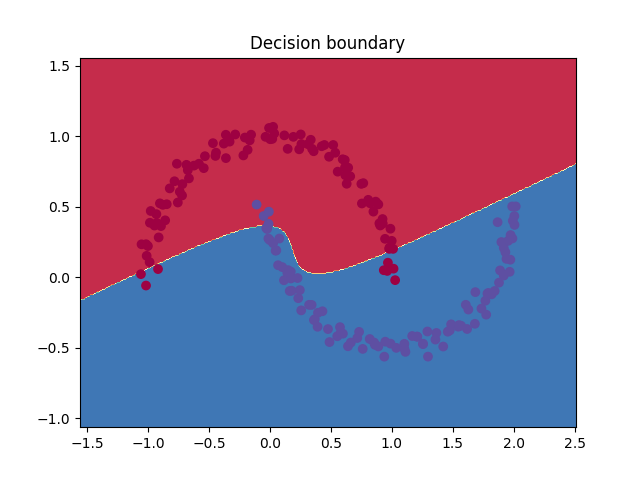

In [455]:
np.random.seed(0)
X, Y = sklearn.datasets.make_moons(200, noise = 0.042)
plt.scatter(X[:,0], X[:,1], s = 40, c = Y, cmap = plt.cm.Spectral)

In [456]:
def plot_decision_boundary(function):
    x_min, x_max = X[:,0].min() - 0.5, X[:,0].max() + 0.5
    y_min, y_max = X[:,1].min() - 0.5, X[:,1].max() + 0.5
    h = 0.01
    
    x, y = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = function(np.c_[x.ravel(), y.ravel()])
    Z = Z.reshape(x.shape)
    
    plt.contourf(x, y, Z, cmap = plt.cm.Spectral)
    plt.scatter(X[:,0], X[:,1], c = Y, cmap = plt.cm.Spectral)

In [457]:
#Initialize hyper-parameters
num_examples = len(X)
input_layers = 2
output_layers = 2

learning_rate = 0.001
regularizer = 0.1

In [458]:
#Cross-entropic loss
def loss(model) :
    w1, b1, w2, b2 = model['w1'], model['b1'], model['w2'], model['b2'] 
    
    z1 = X.dot(w1) + b1
    a1 = expit(z1)
    z2 = a1.dot(w2) + b2
    exp_scores = np.exp(z2)
    normalized_scores = exp_scores/np.sum(exp_scores, axis = 1, keepdims = True)
    
    log_scores = -1 * np.log(normalized_scores[range(num_examples), Y])
    data_loss = np.sum(log_scores)
    data_loss += (regularizer/2) * ( np.sum(np.square(w1)) + np.sum(np.square(w2)) )
    
    return data_loss/num_examples

In [459]:
def hypothesis(model, x) :
    w1, b1, w2, b2 = model['w1'], model['b1'], model['w2'], model['b2']
    
    z1 = x.dot(w1) + b1
    a1 = expit(z1)
    z2 = a1.dot(w2) + b2
    
    #Softmax normalization of scores
    exp_scores = np.exp(z2)
    probs = exp_scores/np.sum(exp_scores, axis = 1, keepdims = True)

    return np.argmax(probs, axis = 1)

In [460]:
#Gradient descent using backpropagation
def train_model(hidden_layers, epochs = 60000, print_loss = False) :
    np.random.seed(0)
    w1 = np.random.randn(input_layers, hidden_layers)/ np.sqrt(input_layers)
    b1 = np.zeros((1, hidden_layers))
    w2 = np.random.randn(hidden_layers, output_layers)/ np.sqrt(hidden_layers)
    b2 = np.zeros((1, output_layers))
    
    model = {}
    
    for i in range(epochs) :

        #Forward propagation
        z1 = X.dot(w1) + b1
        a1 = expit(z1)
        z2 = a1.dot(w2) + b2
        
        exp_scores = np.exp(z2)
        probs = exp_scores/np.sum(exp_scores, axis = 1, keepdims = True)
        
        #Backpropagation
        delta3 = probs
        delta3[range(num_examples), Y] -= 1
        dw2 = (a1.T).dot(delta3)
        db2 = np.sum(delta3, axis = 0, keepdims = True)
        
        delta2 = delta3.dot(w2.T) * a1 * (1 - a1)
        dw1 = np.dot(X.T, delta2)
        db1 = np.sum(delta2, axis = 0)
        
        dw2 += regularizer * w2
        dw1 += regularizer * w1
        
        w1 += -1 * learning_rate * dw1
        w2 += -1 * learning_rate * dw2
        
        model = {'w1' : w1, 'w2' : w2, 'b1' : b1, 'b2' : b2}
        
        if print_loss and i % 1000 == 0 :
            print("Loss after epoch ", i, " is ", loss(model))
            
    return model        

In [461]:
model = train_model(4, print_loss = True)
plot_decision_boundary(lambda x : hypothesis(model, x))
plt.title("Decision boundary")

Loss after epoch  0  is  0.675408549747
Loss after epoch  1000  is  0.265040005328
Loss after epoch  2000  is  0.263429614501
Loss after epoch  3000  is  0.262517340776
Loss after epoch  4000  is  0.261731946144
Loss after epoch  5000  is  0.260848494851
Loss after epoch  6000  is  0.25960310912
Loss after epoch  7000  is  0.257539526249
Loss after epoch  8000  is  0.253861303318
Loss after epoch  9000  is  0.247779069159
Loss after epoch  10000  is  0.239942520241
Loss after epoch  11000  is  0.232671056996
Loss after epoch  12000  is  0.227516491106
Loss after epoch  13000  is  0.224407798939
Loss after epoch  14000  is  0.222673301794
Loss after epoch  15000  is  0.221731055346
Loss after epoch  16000  is  0.221218035974
Loss after epoch  17000  is  0.220933749077
Loss after epoch  18000  is  0.220772340314
Loss after epoch  19000  is  0.220678338179
Loss after epoch  20000  is  0.220622288925
Loss after epoch  21000  is  0.220588174468
Loss after epoch  22000  is  0.22056703739
Los